In [1]:
import os
os.chdir('C:/Users/Kamar/Downloads/email_/IWSPA')

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import warnings
warnings.filterwarnings('ignore')

In [3]:
phish= pd.read_csv('phish.csv')

In [4]:
phish.head(5)

,Content
0,"Dear Member,\nYou have 1 new Important securit..."
1,"APPLE SERVICE ANNOUNCEMENT\nDear user@domain ,..."
2,This is an urgent notice from the board of gov...
3,We recently blocked a sign-in attempt to your ...
4,Our schedule and requirements have been mandat...


In [5]:
legit = pd.read_csv('legit.csv')

In [6]:
legit.head(5)

,Content
0,"Thank you for your reply, the local NSM respon..."
1,Daniele Milan updated a event in the TENTATIVE...
2,To be automatically unsubscribed from this lis...
3,"Ciao Ale,\ngrazie mille.\nBuona giornata.\ncia..."
4,@media only screen and=\n(max-width: 730px) { ...


In [7]:
#Add category 
legit["Class"] = 'legitimate'
phish["Class"] = 'phishing'

In [8]:
legit.rename(columns={'Content':'Emails'}, inplace=True)
phish.rename(columns={'Content':'Emails'}, inplace=True)

In [9]:
#checking total number of news both legitimate  and phishing 
print("Legitimate Email : ", legit.Emails.count())
print("Phishing Email : ", phish.Emails.count())

Legitimate Email :  5092
Phishing Email :  629


In [10]:
#Merge into one dataset
df_dataset = pd.concat([legit,phish])
print("Dataset : ", df_dataset.Emails.count())

Dataset :  5721


In [11]:
df_dataset.head(5)

,Emails,Class
0,"Thank you for your reply, the local NSM respon...",legitimate
1,Daniele Milan updated a event in the TENTATIVE...,legitimate
2,To be automatically unsubscribed from this lis...,legitimate
3,"Ciao Ale,\ngrazie mille.\nBuona giornata.\ncia...",legitimate
4,@media only screen and=\n(max-width: 730px) { ...,legitimate


In [12]:
df_dataset['Class'].value_counts()

legitimate    5092
phishing       629
Name: Class, dtype: int64

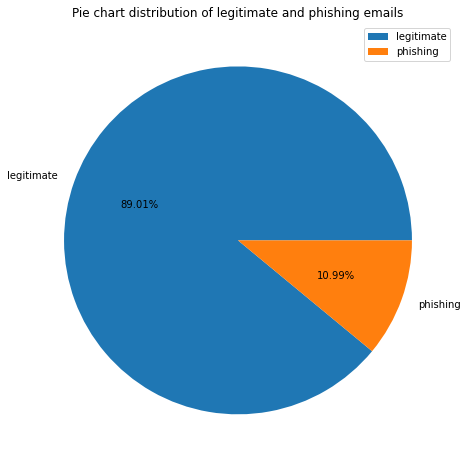

In [13]:
df_ =df_dataset['Class'].value_counts() 
plt.figure(figsize=(8,8))
plt.title("Pie chart distribution of legitimate and phishing emails")
plt.pie(df_.values, labels = df_ .index,autopct='%0.2f%%')
plt.legend()
plt.show()

In [14]:
df_dataset['Emails'] =df_dataset['Emails'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
df_dataset['Emails'].head(10)

0    thank you for your reply, the local nsm respon...
1    daniele milan updated a event in the tentative...
2    to be automatically unsubscribed from this lis...
3    ciao ale, grazie mille. buona giornata. ciao a...
4    @media only screen and= (max-width: 730px) { ....
5    05/13/2016 07:12 am edt by ben smith (user@dom...
6    hi steven,�i was hoping to get a quick read of...
7    dear sarah, ben and i have had some long discu...
8    to be automatically unsubscribed from this lis...
9    crew, the situation is worse than we thought i...
Name: Emails, dtype: object

In [16]:
df_dataset['Emails'] = df_dataset['Emails'].str.replace('[^\w\s]','')
df_dataset['Emails'].head(10)

0    thank you for your reply the local nsm respons...
1    daniele milan updated a event in the tentative...
2    to be automatically unsubscribed from this lis...
3    ciao ale grazie mille buona giornata ciao anto...
4    media only screen and maxwidth 730px  leaderbo...
5    05132016 0712 am edt by ben smith userdomain b...
6    hi steveni was hoping to get a quick read of w...
7    dear sarah ben and i have had some long discus...
8    to be automatically unsubscribed from this lis...
9    crew the situation is worse than we thought in...
Name: Emails, dtype: object

In [17]:
import nltk
from nltk.corpus import stopwords

In [18]:
#remove stop words
stop = stopwords.words('english')
df_dataset['Emails']= df_dataset['Emails'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_dataset['Emails'].head(10)

0    thank reply local nsm response kind eager lear...
1    daniele milan updated event tentative activity...
2    automatically unsubscribed list please email u...
3    ciao ale grazie mille buona giornata ciao anto...
4    media screen maxwidth 730px leaderboard di spl...
5    05132016 0712 edt ben smith userdomain buzzfee...
6    hi steveni hoping get quick read think happen ...
7    dear sarah ben long discussions paper made qui...
8    automatically unsubscribed list please email u...
9    crew situation worse thought las vegas despite...
Name: Emails, dtype: object

In [19]:
# Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
df_dataset['Emails'] = df_dataset['Emails'].apply(lambda a: " ".join([lem.lemmatize(word) for word in a.split()]))
df_dataset.Emails.head(10)

0    thank reply local nsm response kind eager lear...
1    daniele milan updated event tentative activity...
2    automatically unsubscribed list please email u...
3    ciao ale grazie mille buona giornata ciao anto...
4    medium screen maxwidth 730px leaderboard di sp...
5    05132016 0712 edt ben smith userdomain buzzfee...
6    hi steveni hoping get quick read think happen ...
7    dear sarah ben long discussion paper made quit...
8    automatically unsubscribed list please email u...
9    crew situation worse thought la vega despite n...
Name: Emails, dtype: object

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud

In [21]:
# Join the different processed comments together.
long_string = ','.join(list(df_dataset["Emails"].values))

In [22]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [23]:
wordcloud = WordCloud(background_color='white').generate(long_string)

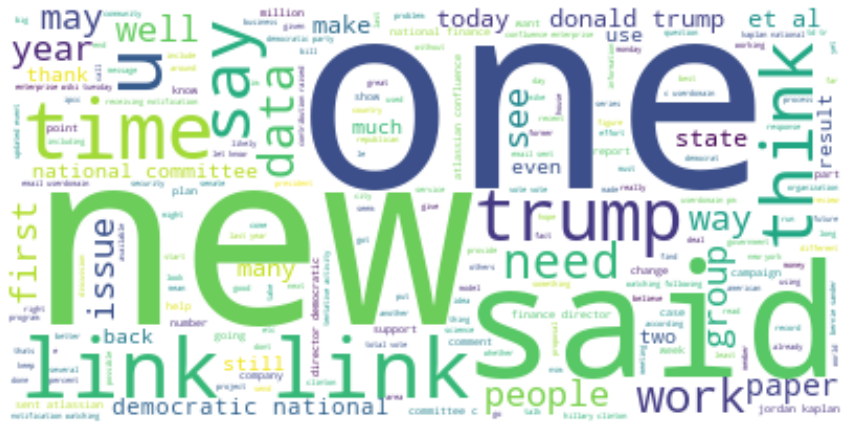

In [24]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
#Tokenization
df_dataset['Emails']= df_dataset['Emails'].apply(lambda x: x.split())
df_dataset.Emails.head(10)

0    [thank, reply, local, nsm, response, kind, eag...
1    [daniele, milan, updated, event, tentative, ac...
2    [automatically, unsubscribed, list, please, em...
3    [ciao, ale, grazie, mille, buona, giornata, ci...
4    [medium, screen, maxwidth, 730px, leaderboard,...
5    [05132016, 0712, edt, ben, smith, userdomain, ...
6    [hi, steveni, hoping, get, quick, read, think,...
7    [dear, sarah, ben, long, discussion, paper, ma...
8    [automatically, unsubscribed, list, please, em...
9    [crew, situation, worse, thought, la, vega, de...
Name: Emails, dtype: object

In [26]:
df_dataset["Emails"]
print(df_dataset["Emails"])
df_dataset["Emails"].count()

0      [thank, reply, local, nsm, response, kind, eag...
1      [daniele, milan, updated, event, tentative, ac...
2      [automatically, unsubscribed, list, please, em...
3      [ciao, ale, grazie, mille, buona, giornata, ci...
4      [medium, screen, maxwidth, 730px, leaderboard,...
                             ...                        
624    [dear, member, expert, member, service, team, ...
625    [hello, tuesday, june, 20, 2017, request, dele...
626    [dear, userdomain, received, instruction, empt...
627    [dear, outlook, client, notification, id, n1dc...
628    [bank, ireland, safeguard, account, possibilit...
Name: Emails, Length: 5721, dtype: object


5721

In [27]:
df_dataset.head()

,Emails,Class
0,"[thank, reply, local, nsm, response, kind, eag...",legitimate
1,"[daniele, milan, updated, event, tentative, ac...",legitimate
2,"[automatically, unsubscribed, list, please, em...",legitimate
3,"[ciao, ale, grazie, mille, buona, giornata, ci...",legitimate
4,"[medium, screen, maxwidth, 730px, leaderboard,...",legitimate


In [28]:
df_dataset['Emails'][5]

5    [05132016, 0712, edt, ben, smith, userdomain, ...
5    [department, chair, unit, leader, please, dist...
Name: Emails, dtype: object

In [29]:
df_dataset['Class']=df_dataset.Class.replace({'legitimate':0,'phishing':1})

In [30]:
#- legitimate is 0 and phishing is 1
df_dataset.head(4)

,Emails,Class
0,"[thank, reply, local, nsm, response, kind, eag...",0
1,"[daniele, milan, updated, event, tentative, ac...",0
2,"[automatically, unsubscribed, list, please, em...",0
3,"[ciao, ale, grazie, mille, buona, giornata, ci...",0


In [31]:
df_dataset.shape

(5721, 2)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_dataset.Emails, df_dataset.Class, test_size = 0.2, random_state = 0)

In [34]:
print(X_train[0])

0    [dear, member, 1, new, important, security, no...
0    [thank, reply, local, nsm, response, kind, eag...
Name: Emails, dtype: object


In [35]:
print(X_test)


1692    [hi, guy, comms, updated, building, 2016, docu...
3251    [laura, wasnt, alex, supposed, send, letter, m...
1369    [sorry, miss, thursday, n, ight, jennye28099s,...
3260    [talus, going, philly, wanted, try, get, sadi,...
1453    [helpful, raul, alvillar, national, political,...
                              ...                        
562     [convergence, cyber, attack, physical, protest...
95      [doctype, html, public, w3cdtd, xhtml, 10, str...
2718    [mike, presumably, youve, seen, forwarded, ema...
1050    [jordan, yesterday, united, state, internation...
3255    [date, mon, 9, oct, 2000, 180804, 0500, rashit...
Name: Emails, Length: 1145, dtype: object


In [36]:
print(y_train)


4667    0
3932    0
2731    0
2118    0
1281    0
       ..
4931    0
3264    0
1653    0
2607    0
2732    0
Name: Class, Length: 4576, dtype: int64


In [37]:
print(y_test)

1692    0
3251    0
1369    0
3260    0
1453    0
       ..
562     0
95      0
2718    0
1050    0
3255    0
Name: Class, Length: 1145, dtype: int64


In [38]:
print('X_train', X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (4576,)
y_train (4576,)
X_test (1145,)
y_test (1145,)


In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# print(word_index)

In [41]:
tokenized_train = tokenizer.texts_to_sequences(X_train)
# print(tokenized_train)
padded = pad_sequences(tokenized_train, maxlen = 300)
X_train = padded
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(tokenized_test, maxlen=300)

In [42]:
print(X_train)
print(X_test)
print(padded.shape)

[[   0    0    0 ...   69   70  535]
 [   0    0    0 ... 1307 1307 1307]
 [   0    0    0 ...   74  488 7497]
 ...
 [   0    0    0 ...    8 4627  248]
 [   0    0    0 ... 1383 2332 2333]
 [   0    0    0 ...    0    0    0]]
[[   0    0    0 ...  325   94 9277]
 [   0    0    0 ...  133  195 3981]
 [   0    0    0 ...  302  340 5135]
 ...
 [3249  385 4296 ...    1  107  112]
 [   0    0    0 ...   40  121  271]
 [1870 2769  386 ...  606   25    1]]
(4576, 300)


In [43]:
#its important to use the glove.6B.300d.txt embeddings 5
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open("/Users/Kamar/Downloads/email_/email/glove.6B.300d.txt", encoding ='utf8'))


In [44]:
max_features = 10000
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [45]:
print(embedding_matrix.shape)

(10000, 300)


In [46]:
import math
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [47]:
model = Sequential([
    Embedding(max_features, output_dim = embedding_matrix.shape[1], weights = [embedding_matrix], input_length = 300, trainable = False),
    LSTM(128, return_sequences = True),
    LSTM(128, return_sequences = True, recurrent_dropout = 0.25 , dropout = 0.25),
    LSTM(64, recurrent_dropout = 0.1 , dropout = 0.1),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')   
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          3000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          219648    
                                                                 
 lstm_1 (LSTM)               (None, 300, 128)          131584    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,402,753
Trainable params: 402,753
Non-tr

In [48]:
ACCURACY_THRESHOLD = 0.95

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

def step_decay(epochs):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

checkpoint = ModelCheckpoint("model_checkpoints_weights/model_weights-{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='loss', verbose=1,save_best_only=True, mode='auto', period=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [49]:
import time

In [50]:
start = time.time

In [51]:
history = model.fit(X_train, y_train , validation_data = (X_test,y_test), batch_size = 256 , epochs = 10, callbacks = [checkpoint,learning_rate_reduction])

Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 0.3864 - accuracy: 0.8558 
Epoch 00001: loss improved from inf to 0.38642, saving model to model_checkpoints_weights\model_weights-01-0.90.hdf5
18/18 [==============================] - 328s 17s/step - loss: 0.3864 - accuracy: 0.8558 - val_loss: 0.3398 - val_accuracy: 0.8978 - lr: 0.0100
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 0.3447 - accuracy: 0.8881 
Epoch 00002: loss improved from 0.38642 to 0.34465, saving model to model_checkpoints_weights\model_weights-02-0.90.hdf5
18/18 [==============================] - 404s 23s/step - loss: 0.3447 - accuracy: 0.8881 - val_loss: 0.2949 - val_accuracy: 0.8978 - lr: 0.0100
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 0.2070 - accuracy: 0.9014 
Epoch 00003: loss improved from 0.34465 to 0.20695, saving model to model_checkpoints_weights\model_weights-03-0.94.hdf5
18/18 [==============================] - 431s 23s/step - loss: 0.207

In [52]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

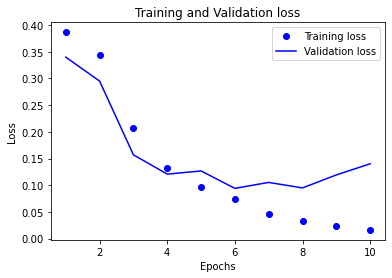

In [54]:
#plotting training and validation loss graph
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range (1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

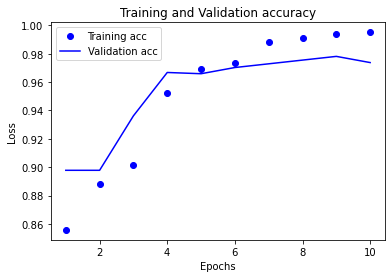

In [55]:
#plotting training and validation accuracy graph
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
y_pred = model.predict(X_test)

In [57]:
y_pred=(y_pred>=0.5).astype(int)

In [58]:
#evaluating the model
model.evaluate(X_test,y_test)

36/36 [==============================] - 23s 633ms/step - loss: 0.1402 - accuracy: 0.9738


[0.14017274975776672, 0.9737991094589233]

In [59]:
#checking model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          3000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          219648    
                                                                 
 lstm_1 (LSTM)               (None, 300, 128)          131584    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,402,753
Trainable params: 402,753
Non-tr

In [60]:
#checking metric using ROC and AUC
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

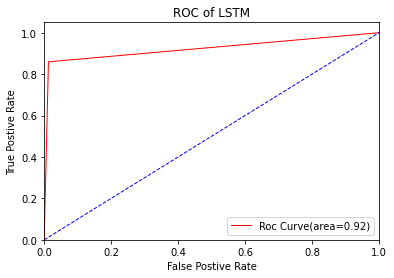

In [61]:
plt.plot(fpr,tpr,color='red',lw=1,label='Roc Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=1,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('ROC of LSTM')
plt.legend(loc='lower right')
plt.show()

[[1011   17]
 [  13  104]]


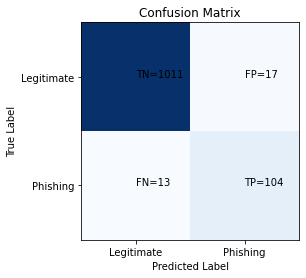

In [62]:
#checking metric using confusion matrix
from sklearn.metrics import confusion_matrix #,consensus_score
cm= confusion_matrix(y_test,y_pred)
print(cm)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
classNames=['Legitimate','Phishing']
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)#rotation=45)
plt.yticks(tick_marks,classNames)
s=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]))
plt.show()

In [63]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Rate: %.2f%%" % (accuracy * 100.0))
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision:%.3f'%precision_score(y_test,y_pred))
print(' ')
print('Recall:%.3f'%recall_score(y_test,y_pred))
print(' ')
print('F1:%.3f'%f1_score(y_test,y_pred))

Accuracy Rate: 97.38%
Precision:0.860
 
Recall:0.889
 
F1:0.874


In [64]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("model_new.h5")
print("Saved model to disk")

Saved model to disk


In [81]:
email_sample = ['This is a payment confirmation e-mail for the ticket you ordered on Delta.com website.Your credit card has been charged.You can download and print your ticket from our website :<<link>> 788&flight=WA772441 For more information regarding your order, contact our technical support by visiting :<<link>> a.com/content/www/en_US/support.htmlThank you for flying with Delta Airlines ©2017 Delta Air Lines, Inc.']

In [82]:
email_tokenizer = tokenizer.texts_to_sequences(email_sample)

In [83]:
x =pad_sequences(email_tokenizer,maxlen=300)

In [84]:
(model.predict(x)>=0.5).astype(int)

array([[1]])

In [77]:
from keras.models import load_model
model2 = load_model('model_new.h5')

In [78]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [79]:
result = (model2.predict(x)>=0.5)

In [80]:
result

array([[False]])

In [ ]:
This is a payment confirmation e-mail for the ticket you ordered on Delta.com website.Your credit card has been charged.You can download and print your ticket from our website :<<link>> 788&flight=WA772441 For more information regarding your order, contact our technical support by visiting :<<link>> a.com/content/www/en_US/support.htmlThank you for flying with Delta Airlines ©2017 Delta Air Lines, Inc.